In [63]:
# As always, we import the modules we need
from netCDF4 import num2date
from pydap.client import open_dods, open_url
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import pandas as pd
import datetime
import glob

## 1. Get data from EBAS

In [64]:
# get data using API
ds = open_dods(
'http://dev-ebas-pydap.nilu.no/'
'NO0042G.dmps.IMG.pm10.particle_number_size_distribution'
'.1h.NO01L_DMPS_ZEP1_NRT.NO01L_dmps_DMPS_ZEP01..dods')

In [8]:
#get the actual data
dmps_data = ds['particle_number_size_distribution']

# get normalised size distribution in dNdlogDp
dNdlogDp= dmps_data.particle_number_size_distribution.data

# get time in datatime format using function from netCDF4 package
tim_dmps = num2date(dmps_data.time.data,units='days since 1900-01-01 00:00:00',
calendar='gregorian')

# get diameter vector
dp_NILU = dmps_data.D.data

## 2. Get metadata

In [28]:
# get metadata if needed
# dmps_metadata = ds['particle_number_size_distribution_ebasmetadata'].particle_number_size_distribution_ebasmetadata.data
# print(len(dmps_metadata))
# print(dmps_metadata[0])


## 3. Convert to pandas

In [69]:
# make DataFrame to simplify the handling of data
df_NILU = pd.DataFrame(dNdlogDp,index=dp_NILU,columns=tim_dmps)
# diplay DataFrame
# df_NILU

## 4. Calculate total number concentration

In [72]:
# Get NILU data for 1 Jan - 5 May 2017 for diameters within 11:100nm range
df_NILU_common_long = df_NILU.loc[11:100,'2017-01-01 00:30':'2017-05-05 23:30'].T
# Inegrate over log10(Dp) to get Ntot
Ntot_NILU_common_long = pd.Series(np.trapz(df_NILU_common_long,
x = np.log10(df_NILU_common_long.columns)),
index=df_NILU_common_long.index.copy())

In [73]:
# Get NILU data for 1 Jan - 5 May 2017 for diameters within 100:500nm range
df_NILU_common_long_1 = df_NILU.loc[100:500,'2017-01-01 00:30':'2017-05-05 23:30'].T
# Inegrate over log10(Dp) to get Ntot
Ntot_NILU_common_long_1 = pd.Series(np.trapz(df_NILU_common_long_1,
x = np.log10(df_NILU_common_long_1.columns)),
index=df_NILU_common_long_1.index.copy())

## 5. Plot timeseries

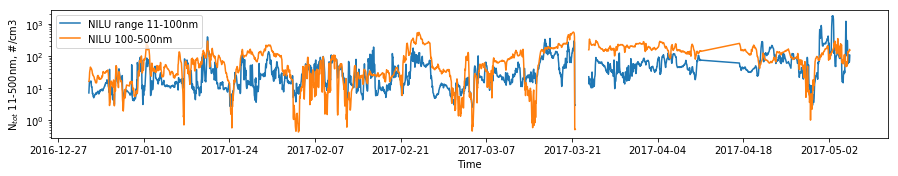

In [77]:
# Create figure
plt.figure(figsize=(15,8))
# Plot data log scale
plt.subplot(3,1,1)
9
ax01, = plt.semilogy(Ntot_NILU_common_long)
ax02, = plt.semilogy(Ntot_NILU_common_long_1)
# Set y-axis label
plt.ylabel(r'N$_{tot}$ 11-500nm, #/cm3')
# Set x-axis label
plt.xlabel(r'Time')
# set legend
plt.legend([ax01, ax02], ['NILU range 11-100nm', 'NILU 100-500nm'])